In [1]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [2]:
import pandas as pd
import numpy as np
# import ml_metrics as metrics
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


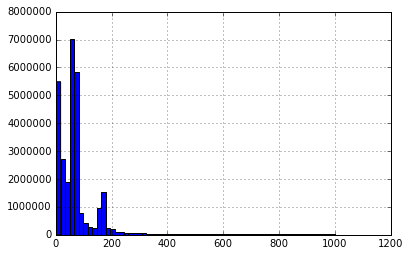

In [5]:
df.accuracy.hist(bins=64)

In [6]:
len(df.place_id.value_counts())

108390

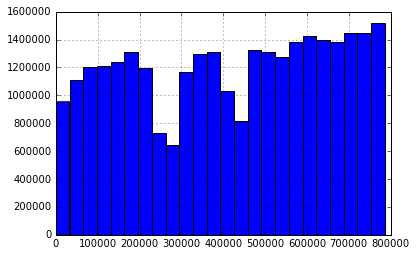

In [7]:
df.time.hist(bins=24)

In [8]:
df.shape

(29118021, 6)

In [9]:
len(df.place_id.value_counts()[df.place_id.value_counts() > 1000])

3722

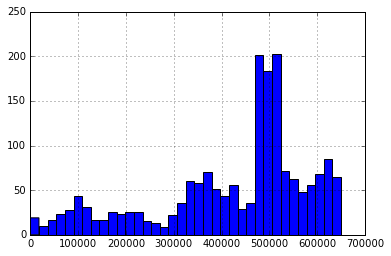

In [10]:
df[df.place_id==8772469670].time.hist(bins=36)

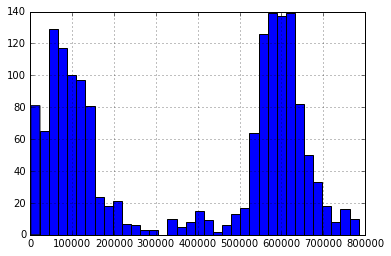

In [11]:
df[df.place_id==9903336130].time.hist(bins=36)

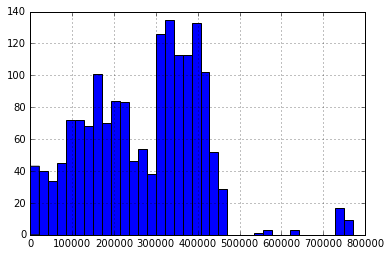

In [12]:
df[df.place_id==8607353836].time.hist(bins=36)

In [13]:
df.shape

(29118021, 6)

In [56]:
np.random.seed(12)
subsample_ind = np.random.randint(0, df.shape[0], 100000)
subsample = df.iloc[subsample_ind]

In [57]:
# df[['x', 'y']].iloc[:1000].plot(x='x', y='y', kind='scatter')

In [58]:
df.place_id.value_counts().describe()

count    108390.000000
mean        268.641212
std         267.944598
min           1.000000
25%          98.000000
50%         163.000000
75%         333.000000
max        1849.000000
Name: place_id, dtype: float64

In [59]:
from sklearn.cluster import MeanShift

In [60]:
X = subsample[['x', 'y']]
ms = MeanShift(bandwidth=0.1)
ms.fit(X)

MeanShift(bandwidth=0.1, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [65]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
X['labels'] = labels
X.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,x,y,labels
24590155,8.8752,6.1102,830
3905179,2.4074,6.6431,1784
24372614,5.1033,6.6692,408
26627325,0.2153,2.1781,157
23633137,7.5009,9.1634,1418


In [70]:
##find average coordinates for each place:
df.head()

,row_id,x,y,accuracy,time,place_id
0,0,0.7941,9.0809,54,470702,8523065625
1,1,5.9567,4.7968,13,186555,1757726713
2,2,8.3078,7.0407,74,322648,1137537235
3,3,7.3665,2.5165,65,704587,6567393236
4,4,4.0961,1.1307,31,472130,7440663949


In [72]:
places = df[['x', 'y', 'place_id']].groupby(['place_id']).mean()
places

,x,y
place_id,,
1000015801,2.671644,5.549160
1000017288,7.336637,4.346527
1000025138,0.991042,5.570373
1000052096,2.856777,5.833414
1000063498,4.054855,7.566078
1000213704,2.440268,0.843545
1000383269,2.064636,2.923171
1000392527,1.670799,3.257805
1000472949,6.479654,0.929121


In [82]:
# places['place_id'] = places.index
# places.drop(['place_id'], axis=1, inplace=True)
places.head()

,x,y
place_id,,
1000015801,2.671644,5.549160
1000017288,7.336637,4.346527
1000025138,0.991042,5.570373
1000052096,2.856777,5.833414
1000063498,4.054855,7.566078


In [86]:
places.reset_index(inplace=True)

In [87]:
places.head()

,place_id,x,y
0,1000015801,2.671644,5.549160
1,1000017288,7.336637,4.346527
2,1000025138,0.991042,5.570373
3,1000052096,2.856777,5.833414
4,1000063498,4.054855,7.566078


In [88]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)


In [89]:
clf.fit(places[['x', 'y']], places.place_id)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [ ]:
preds = clf.predict